#### Задание 1
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.



In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [170]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [171]:
from sklearn.datasets import load_boston

boston = load_boston()
data = boston.data
feature_names = boston.feature_names
X = pd.DataFrame(data, columns=feature_names)
price = boston.target

In [172]:
from sklearn.model_selection import train_test_split

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, price, test_size=0.20, random_state=42)

In [174]:
from sklearn.preprocessing import StandardScaler

In [175]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=feature_names)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=feature_names)

In [176]:
from sklearn.manifold import TSNE

In [177]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
X_train_tsne = tsne.fit_transform(X_train_scaled)
X_test_tsne = tsne.fit_transform(X_test_scaled)

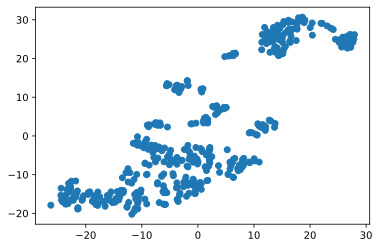

In [178]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])
plt.show()

### Задание 2
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.


In [179]:
from sklearn.cluster import KMeans

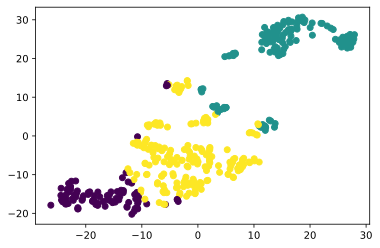

In [180]:
kmeans = KMeans(n_clusters=3, random_state=42, max_iter=100)
labels_train = kmeans.fit_predict(X_train_scaled)
lebels_test = kmeans.predict(X_test_scaled)
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)
plt.show()

In [181]:
print('1: ', y_train[labels_train == 0].mean())
print('2:', y_train[labels_train == 1].mean())
print('3:', y_train[labels_train == 2].mean())

1:  27.78837209302326
2: 16.165354330708663
3: 24.958115183246072


In [182]:
print('1: ', X_train['CRIM'][labels_train == 0].mean())
print('2:', X_train['CRIM'][labels_train == 1].mean())
print('3:', X_train['CRIM'][labels_train == 2].mean())

1:  0.07356558139534886
2: 10.797028425196853
3: 0.42166020942408367


#### * Задание 3
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.


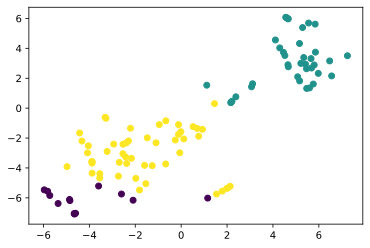

In [183]:
plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1], c=labels_test)
plt.show()

In [184]:
print('1: ', y_test[labels_test == 0].mean())
print('2:', y_test[labels_test == 1].mean())
print('3:', y_test[labels_test == 2].mean())

1:  34.55384615384616
2: 16.710526315789473
3: 21.71764705882353


In [185]:
print('1: ', X_test['CRIM'][labels_test == 0].mean())
print('2:', X_test['CRIM'][labels_test== 1].mean())
print('3:', X_test['CRIM'][labels_test== 2].mean())

1:  0.08308461538461537
2: 9.419181842105264
3: 0.22250117647058823
